### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

<hr>

### Loading the data

In [2]:
data=pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


<hr>

### Pandas Profiling

In [3]:
pf=ProfileReport(data)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Analysis Report <br>
1. 'Serial no' attribute is not contributing for predicting the target variable
2. Handle missing values
3. Normalization needed 
4. Check for multicollinearity

<hr>

### Manual code for above Profiling

In [4]:
# Overview - BASIC ANALYSIS
data.shape
data.isnull().sum()
data.dtypes
data.info()

# Sample
data.head(10)
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307.0,105.0,2.0,2.5,4.5,8.12,1,0.67
491,492,297.0,99.0,4.0,3.0,3.5,7.81,0,0.54
492,493,298.0,101.0,4.0,2.5,4.5,7.69,1,0.53
493,494,300.0,95.0,2.0,3.0,1.5,8.22,1,0.62
494,495,301.0,99.0,3.0,2.5,2.0,8.45,1,0.68
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [5]:
# Variables  - STATISTICAL ANALYSIS
for i in data.columns:
    d=data[i]
    result={}
    result["attribute"]=i
    result["missing"]=d.isnull().sum()
    result["distinct"]=len(d.unique())
    result["mean"]=d.mean()
    result["median"]=d.median()
    result["min"]=d.min()
    result["max"]=d.max()
    print(result)

data.describe(include="all")

{'attribute': 'Serial No.', 'missing': 0, 'distinct': 500, 'mean': 250.5, 'median': 250.5, 'min': 1, 'max': 500}
{'attribute': 'GRE Score', 'missing': 15, 'distinct': 50, 'mean': 316.55876288659795, 'median': 317.0, 'min': 290.0, 'max': 340.0}
{'attribute': 'TOEFL Score', 'missing': 10, 'distinct': 30, 'mean': 107.18775510204081, 'median': 107.0, 'min': 92.0, 'max': 120.0}
{'attribute': 'University Rating', 'missing': 15, 'distinct': 6, 'mean': 3.1216494845360825, 'median': 3.0, 'min': 1.0, 'max': 5.0}
{'attribute': 'SOP', 'missing': 0, 'distinct': 9, 'mean': 3.374, 'median': 3.5, 'min': 1.0, 'max': 5.0}
{'attribute': 'LOR', 'missing': 0, 'distinct': 9, 'mean': 3.484, 'median': 3.5, 'min': 1.0, 'max': 5.0}
{'attribute': 'CGPA', 'missing': 0, 'distinct': 184, 'mean': 8.576439999999998, 'median': 8.56, 'min': 6.8, 'max': 9.92}
{'attribute': 'Research', 'missing': 0, 'distinct': 2, 'mean': 0.56, 'median': 1.0, 'min': 0, 'max': 1}
{'attribute': 'Chance of Admit', 'missing': 0, 'distinct': 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


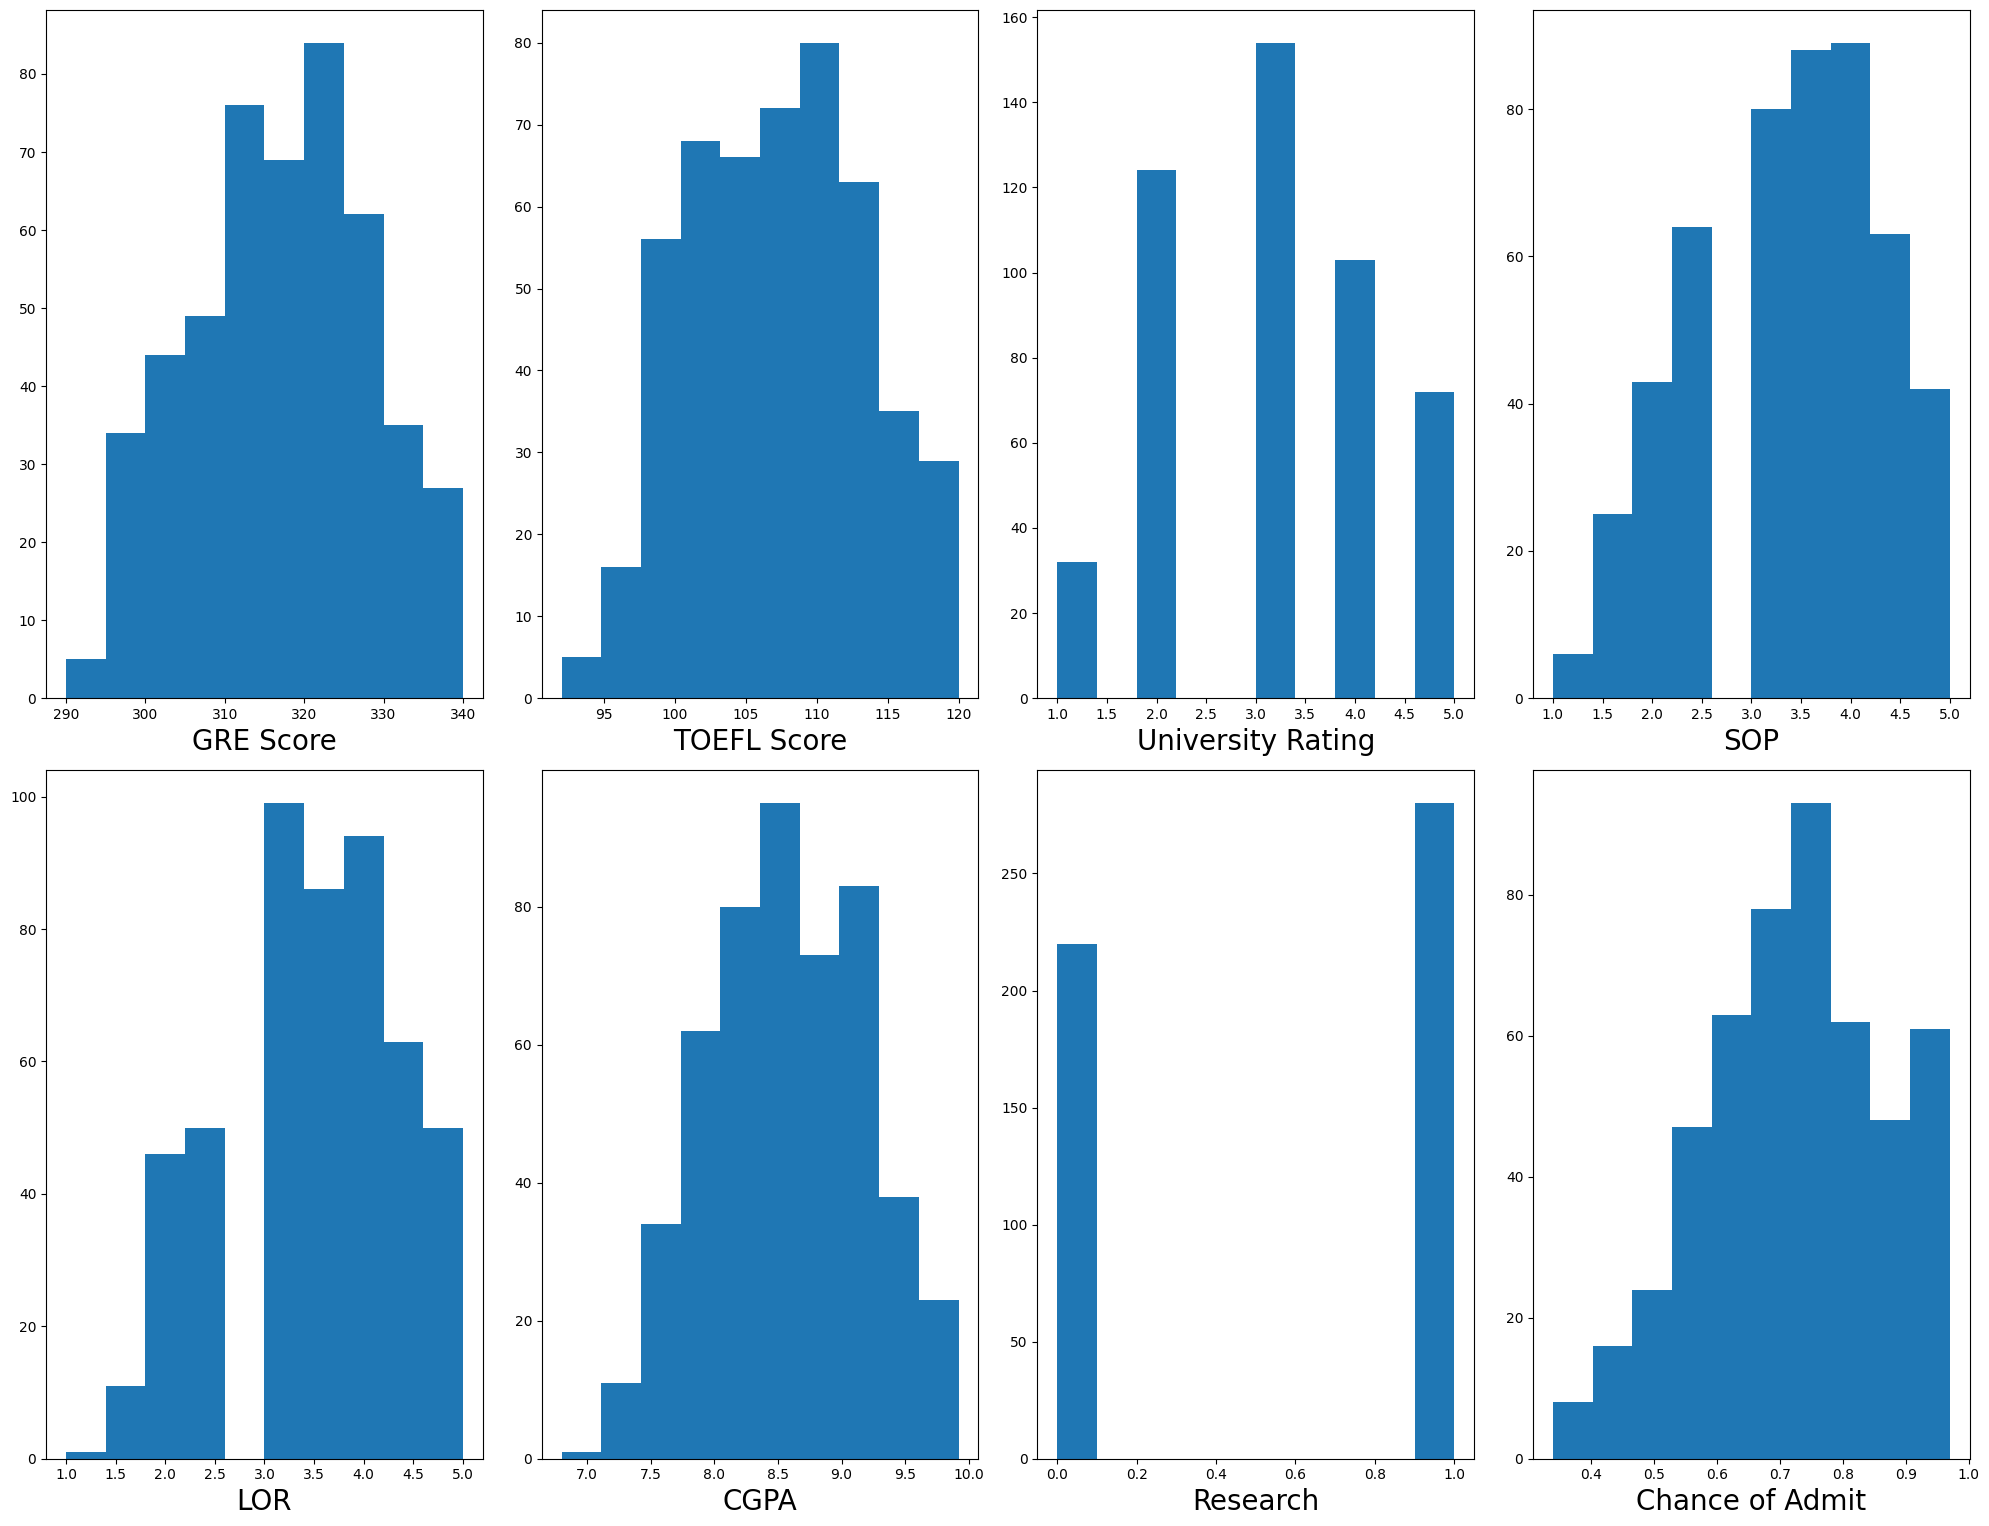

In [6]:
# Distribution of each variable - GRAPHICAL ANALYSIS 

plt.figure(figsize=(20,30))
plotnumber = 1

for column in data.columns[1:9]:
    if plotnumber<=15 :
        ax = plt.subplot(4,4,plotnumber)
        plt.hist(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

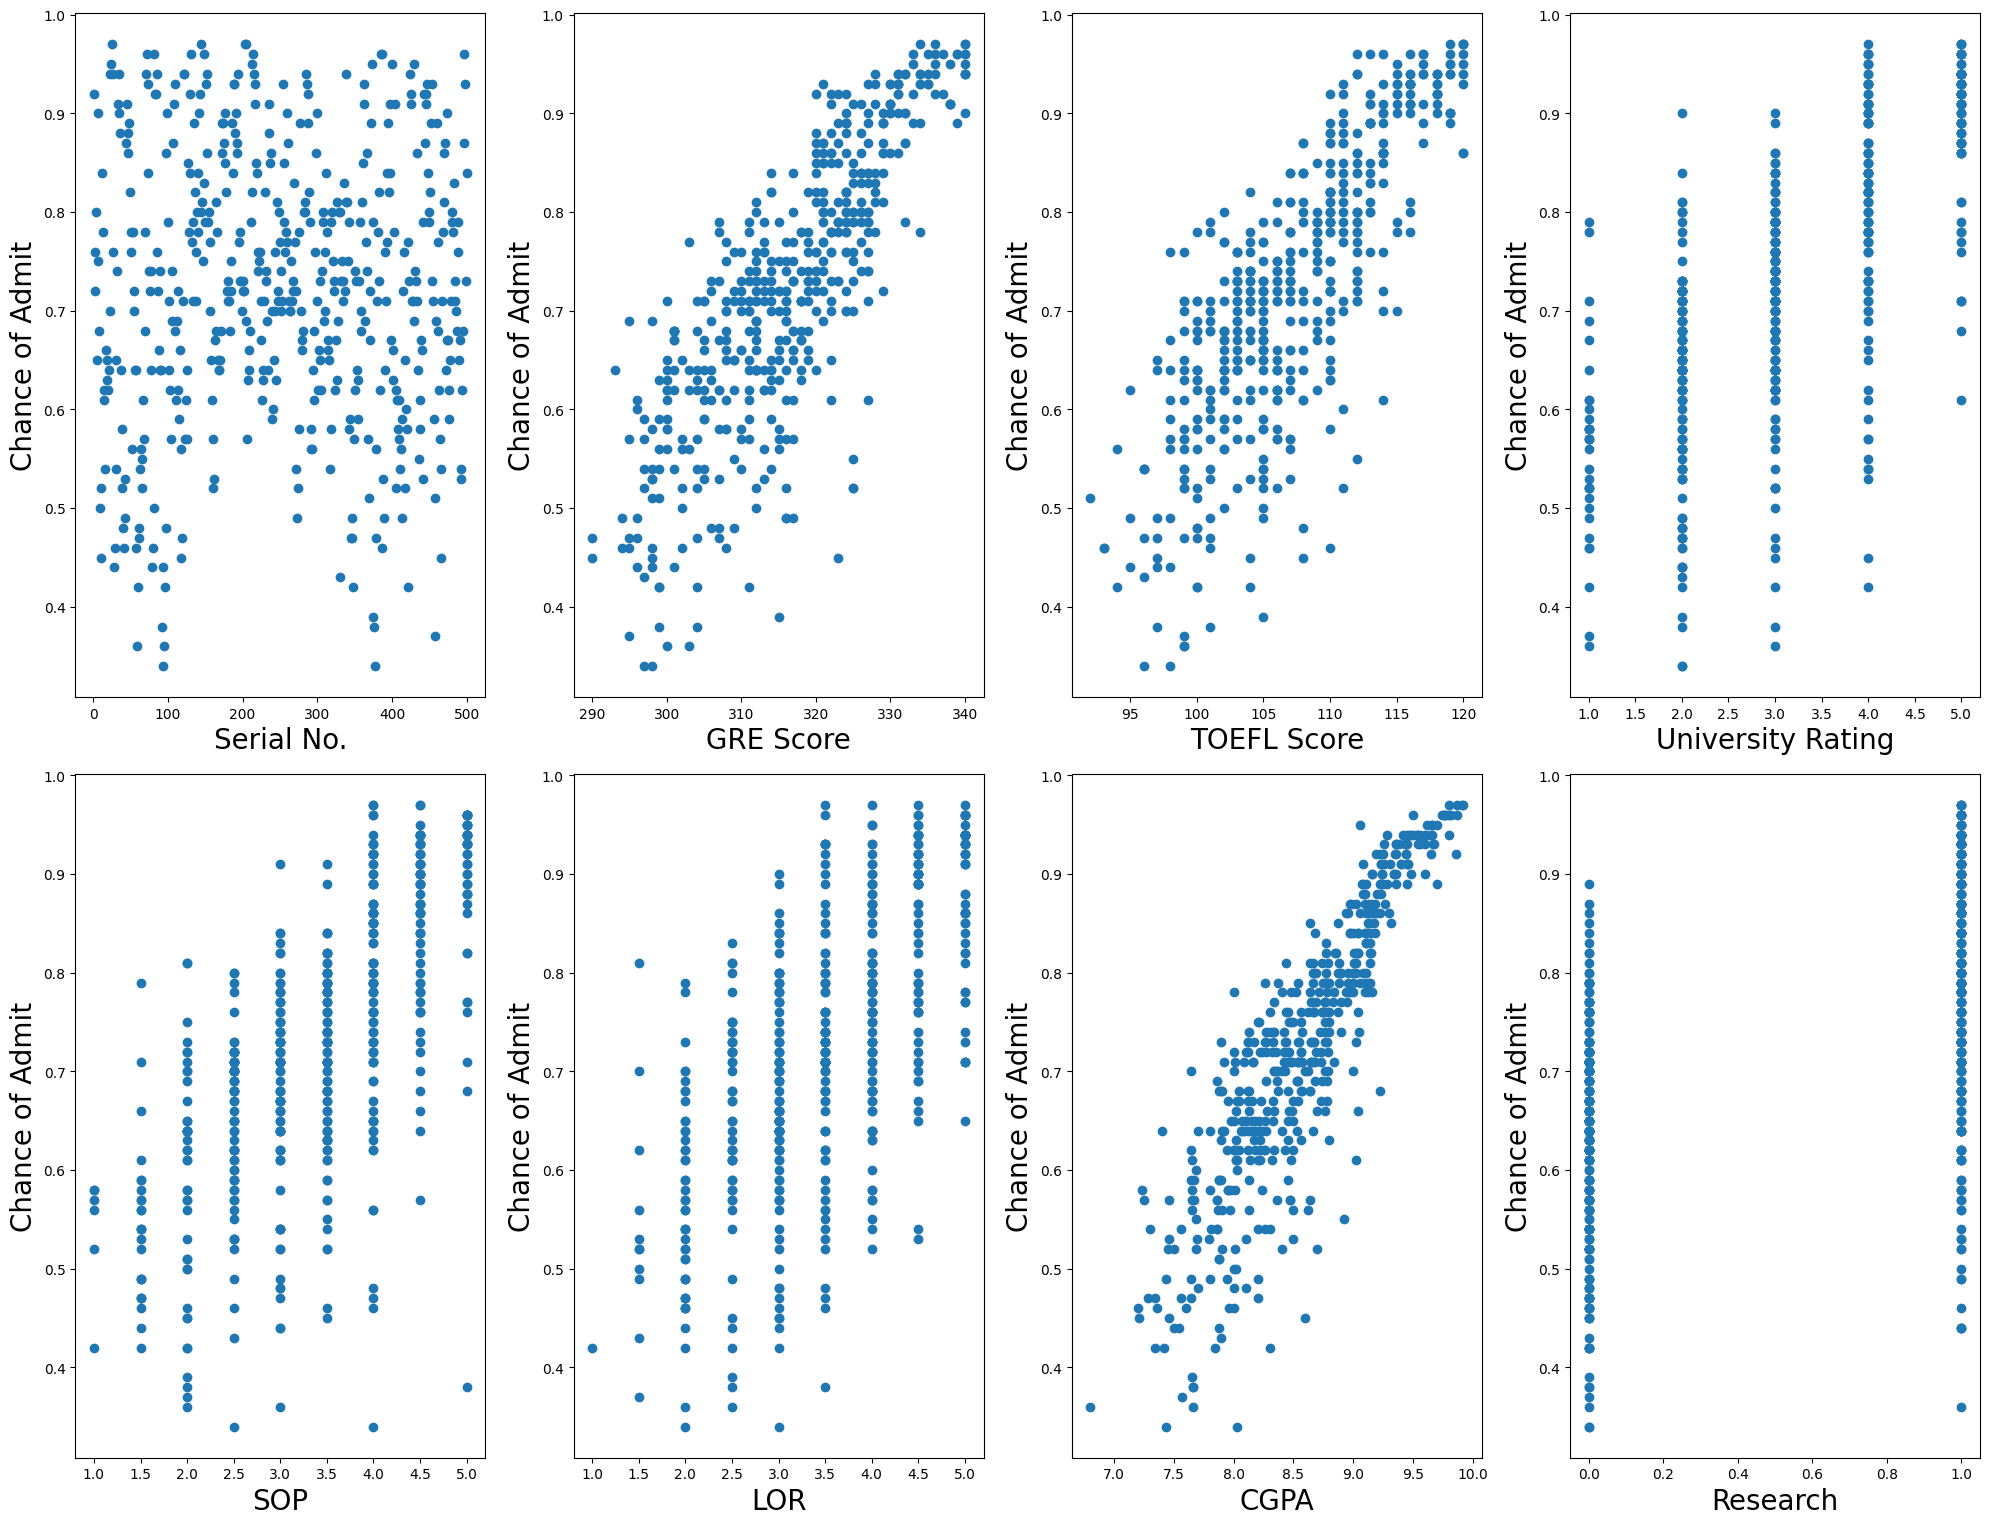

In [7]:
# Interactions - GRAPHICAL ANALYSIS

plt.figure(figsize=(20,30))
plotnumber = 1

for column in data.columns[0:8]:
    if plotnumber<=15 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(data[column],data["Chance of Admit"])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<hr>

### Pre-Processing

In [8]:
# Dropping Serial no. attribute from our dataset

data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
# Removing missing values 

# Attributes which have missing values -
# GRE Score - can be handled by mean 
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

# TOEFL Score  - can be handled by mean   
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

# University Rating  - can be handled by mode (as it is categorical attribute)
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])


In [10]:
# Dividing dataset into X (independent) and Y(dependent) Features
X=data[data.columns[0:7]]
Y=data[data.columns[7:8]]

In [11]:
# Normalization
# we are following standard scaler (Calculates Z score - mean=0 and variance=1)
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [12]:
# Multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


<hr>

### Splitting the data into Training and Testing data


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)

### Training the Model

In [14]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

<hr>

### Saving the Model

In [16]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

scalarname = 'standardization.pickle'
pickle.dump(scaler,open(scalarname,'wb'))

### Predicting the Result

In [17]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.92190162]])

<hr>

### Regularization

In [ ]:
regression.score(X_train,Y_train) # Returns R^2 value

In [ ]:
regression.score(X_test,Y_test)

In [ ]:
regression.coef_

In [ ]:
regression.intercept_

Training accuracy > Testing accuracy <br>
Performing Regularization - LASSO   RIDGE   ELASTIC NET 

##### LASSO

In [ ]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True) # cv: cross validation
lasscv.fit(X_train, Y_train)
lasscv.coef_


In [ ]:
# best alpha parameter
alpha = lasscv.alpha_
alpha
# α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. 
#  Lasso regression comes with a parameter, alpha , and the higher the alpha , the most feature coefficients are zero.
# penality = alpha|coeff|

In [ ]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)
lasso_reg.score(X_test, Y_test)

In [ ]:
lasso_reg.coef_

LASSO Regression gives the same accuracy score as LS model's accuracy

#### RIDGE 

In [ ]:
# Ridge regression model
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)
ridge_model.score(X_test,Y_test)

RIDGE Regression gives the same accuracy score as LS model's accuracy

#### ELASTIC NET 

In [ ]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, Y_train)

In [ ]:
elasticCV.alpha_

In [ ]:
elasticCV.l1_ratio
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, Y_train)
elasticnet_reg.score(X_test, Y_test)

ELASTIC NET Regression gives the same accuracy score as LS model's accuracy

<hr>

So, we can see by using different type of regularization, we still are getting the same r2 score.<br>
That means our LS model has been well trained over the training data and there is no overfitting.

<hr>